In [2]:
#在PyTorch中构建神经网络模型
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.onnx.symbolic_opset9 import tensor
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch.nn as nn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 
from scipy.special import expit

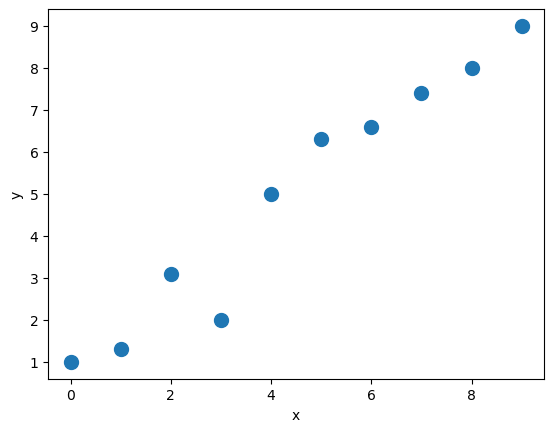

In [31]:
#构建线性回归模型
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 
                    7.4, 8.0, 9.0], dtype='float32')

plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [32]:
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train).float()

In [38]:
train_ds = TensorDataset(X_train_norm, y_train)

batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [36]:
torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)

In [37]:
def loss_fn(input, target):
    return (input-target).pow(2).mean() #均方误差

def model(xb):
    return xb @ weight + bias

In [40]:
learning_rate = 0.001
num_epochs = 200        #训练200此
log_epochs = 10         #记录间隔为10

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()         #直接使用backward()函数计算梯度

        with torch.no_grad():
            weight -= weight.grad * learning_rate
            bias -= bias.grad * learning_rate
            weight.grad.zero_()
            bias.grad.zero_()
            """
            grad.zero_()函数用于将张量的梯度设置为零。‌
在PyTorch中，grad.zero_()是一个重要的函数，用于在每个batch的训练之前执行，以避免累积梯度对训练产生影响。这个操作通常与优化器的zero_grad()方法一起使用，后者用于将模型的参数梯度初始化为0。在训练神经网络时，通过前向传播计算预测值，计算当前损失，然后进行反向传播计算梯度，最后更新所有参数。在这个过程中，grad.zero_()的作用是清除之前累积的梯度值，确保在每个训练批次开始时，模型的参数梯度是干净的，避免将前一个批次的梯度信息带入到当前批次的训练中，从而影响模型的训练过程‌12。
此外，grad.zero_()的使用需要注意，只有当张量被求过一次梯度后，这个函数才能使用。如果张量没有被求过梯度，直接调用grad.zero_()会导致错误。这是因为只有当张量参与了计算图中梯度的计算后，才会拥有.grad属性，进而才能使用grad.zero_()来清除其梯度值‌3。
总的来说，grad.zero_()函数在PyTorch中扮演着重要的角色，它确保了每个训练批次开始时模型参数梯度的清零，是训练神经网络过程中不可或缺的一步。
            """
 
    if epoch % log_epochs==0:
        print(f'Epoch {epoch}  Loss {loss.item():.4f}')

Epoch 0  Loss 0.1055
Epoch 10  Loss 0.0300
Epoch 20  Loss 0.0863
Epoch 30  Loss 0.8329
Epoch 40  Loss 0.1251
Epoch 50  Loss 0.1277
Epoch 60  Loss 0.2779
Epoch 70  Loss 2.3809
Epoch 80  Loss 0.0588
Epoch 90  Loss 0.0612
Epoch 100  Loss 0.0369
Epoch 110  Loss 0.2618
Epoch 120  Loss 0.1363
Epoch 130  Loss 0.2587
Epoch 140  Loss 0.2574
Epoch 150  Loss 2.4236
Epoch 160  Loss 0.0491
Epoch 170  Loss 0.0061
Epoch 180  Loss 0.1386
Epoch 190  Loss 0.1386


Final Parameters: 2.7061362266540527 4.968233108520508


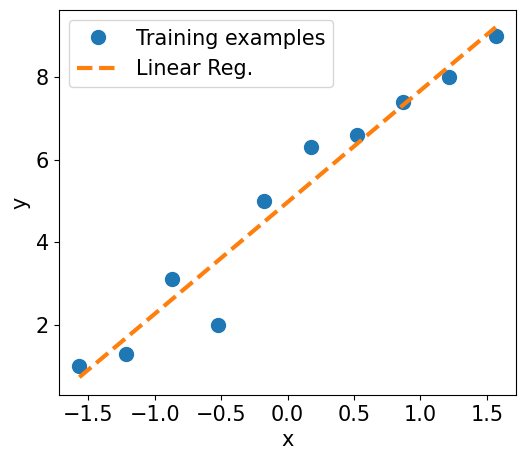

In [41]:
print('Final Parameters:', weight.item(), bias.item())
 
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()
#detach()方法用于从计算图中分离张量，使其成为一个新的张量，这个新张量不再需要梯度信息。
#在预测模式下，我们不需要计算梯度，因为预测不涉及反向传播。.detach()可以帮助减少内存消耗，并避免不必要的计算。

fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

plt.show()